<a href="https://colab.research.google.com/github/priyankkhanna/amexpert_codelab_2021/blob/main/amexpert.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Setting Directory

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

In [ ]:
os.getcwd()

'/content'

In [ ]:
os.listdir()

['.config', 'drive', 'sample_data']

In [ ]:
path = "./drive/MyDrive/amexpert"
os.chdir(path)
os.listdir()

['train.csv',
 'test.csv',
 'sample_submission.csv',
 'details.JPG',
 'catboost_info',
 'r xg+tree+cat 91.64',
 'r xg 91.64',
 'amexpert.ipynb',
 'models',
 'p_data',
 'result91.8',
 '.ipynb_checkpoints',
 'result']

##Importing Data

In [ ]:
import pandas as pd
import numpy as np


In [ ]:
samp = pd.read_csv("sample_submission.csv")
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

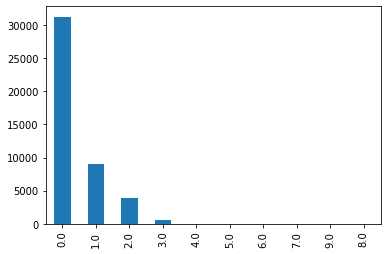

In [ ]:
train['no_of_children'].value_counts().plot(kind='bar')

In [ ]:
train.isnull().sum()

customer_id                  0
name                         0
age                          0
gender                       0
owns_car                   547
owns_house                   0
no_of_children             774
net_yearly_income            0
no_of_days_employed        463
occupation_type              0
total_family_members        83
migrant_worker              87
yearly_debt_payments        95
credit_limit                 0
credit_limit_used(%)         0
credit_score                 8
prev_defaults                0
default_in_last_6months      0
credit_card_default          0
dtype: int64

In [ ]:
test.isnull().sum()

customer_id                  0
name                         0
age                          0
gender                       0
owns_car                   132
owns_house                   0
no_of_children             190
net_yearly_income            0
no_of_days_employed        105
occupation_type              0
total_family_members        31
migrant_worker              26
yearly_debt_payments        22
credit_limit                 0
credit_limit_used(%)         0
credit_score                 3
prev_defaults                0
default_in_last_6months      0
dtype: int64

In [ ]:
train.dtypes

customer_id                 object
name                        object
age                          int64
gender                      object
owns_car                    object
owns_house                  object
no_of_children             float64
net_yearly_income          float64
no_of_days_employed        float64
occupation_type             object
total_family_members       float64
migrant_worker             float64
yearly_debt_payments       float64
credit_limit               float64
credit_limit_used(%)         int64
credit_score               float64
prev_defaults                int64
default_in_last_6months      int64
credit_card_default          int64
dtype: object

In [ ]:
train.head()

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
0,CST_115179,ita Bose,46,F,N,Y,0.0,107934.04,612.0,Unknown,1.0,1.0,33070.28,18690.93,73,544.0,2,1,1
1,CST_121920,Alper Jonathan,29,M,N,Y,0.0,109862.62,2771.0,Laborers,2.0,0.0,15329.53,37745.19,52,857.0,0,0,0
2,CST_109330,Umesh Desai,37,M,N,Y,0.0,230153.17,204.0,Laborers,2.0,0.0,48416.60,41598.36,43,650.0,0,0,0
3,CST_128288,Rie,39,F,N,Y,0.0,122325.82,11941.0,Core staff,2.0,0.0,22574.36,32627.76,20,754.0,0,0,0
4,CST_151355,McCool,46,M,Y,Y,0.0,387286.00,1459.0,Core staff,1.0,0.0,38282.95,52950.64,75,927.0,0,0,0


In [ ]:
import seaborn as sns

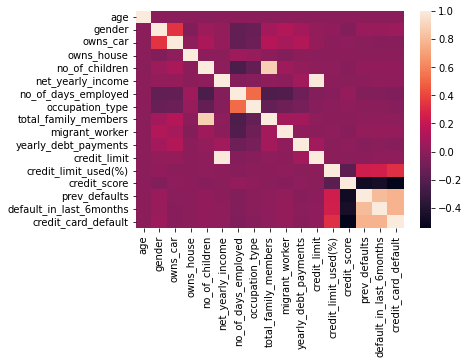

In [ ]:
sns.heatmap(train.corr())

##Processing Data

In [ ]:
remain = ['no_of_children','total_family_members','migrant_worker']
cat = ['gender','owns_car','owns_house','occupation_type']
cons = ['net_yearly_income','no_of_days_employed','yearly_debt_payments','credit_limit','credit_limit_used(%)','credit_score']

In [ ]:
from sklearn.impute import KNNImputer, SimpleImputer
scat = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
scons = KNNImputer(missing_values=np.nan,n_neighbors=5000, weights='distance')
sr = KNNImputer(missing_values=np.nan,n_neighbors=5000, weights='distance')

In [ ]:
train = train.drop("name",axis = 1)
train[cat] = scat.fit_transform(train[cat])
train[cons] = scons.fit_transform(train[cons])
train[remain] = sr.fit_transform(train[remain])

In [ ]:
train.isnull().sum()

customer_id                0
age                        0
gender                     0
owns_car                   0
owns_house                 0
no_of_children             0
net_yearly_income          0
no_of_days_employed        0
occupation_type            0
total_family_members       0
migrant_worker             0
yearly_debt_payments       0
credit_limit               0
credit_limit_used(%)       0
credit_score               0
prev_defaults              0
default_in_last_6months    0
credit_card_default        0
dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
st = StandardScaler()
train[cons]=st.fit_transform(train[cons])
ot = OrdinalEncoder()
train[cat]=ot.fit_transform(train[cat])

In [ ]:
train.head()

,customer_id,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
0,CST_115179,46,0.0,0.0,1.0,0.0,-0.138583,-0.483224,17.0,1.0,1.0,0.073916,-0.167072,0.706855,-2.373436,2,1,1
1,CST_121920,29,1.0,0.0,1.0,0.0,-0.135701,-0.467652,8.0,2.0,0.0,-0.954282,-0.039005,-0.008000,0.737593,0,0,0
2,CST_109330,37,1.0,0.0,1.0,0.0,0.044088,-0.486167,8.0,2.0,0.0,0.963341,-0.013107,-0.314367,-1.319861,0,0,0
3,CST_128288,39,0.0,0.0,1.0,0.0,-0.117073,-0.401511,3.0,2.0,0.0,-0.534394,-0.073400,-1.097303,-0.286164,0,0,0
4,CST_151355,46,1.0,1.0,1.0,0.0,0.278941,-0.477115,3.0,1.0,0.0,0.376026,0.063194,0.774936,1.433350,0,0,0


In [ ]:
y = train.loc[:,"credit_card_default"].to_numpy()
x = train.iloc[:,1:-1].to_numpy()

In [ ]:
x=train.iloc[:,1:-1]

In [ ]:
x=x.drop(['prev_defaults', 'default_in_last_6months'],axis=1).to_numpy()

##Model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV as gc

In [ ]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,shuffle = True)

###catboost

In [ ]:
!pip install catboost

     |████████████████████████████████| 76.3 MB 1.5 MB/s 


In [ ]:
from catboost import CatBoostClassifier

In [ ]:
cb = CatBoostClassifier()

In [ ]:
cb.fit(x,y)

In [ ]:
pred_cat = cb.predict(xtest)

In [ ]:
#f1 score = 0.986688885965297

#array([[8398,    1],
#       [  33,  674]])

###cross val prediction

In [ ]:
pred = cb.predict(xtest)

In [ ]:
pred.dtype

dtype('int64')

In [ ]:
ytest.dtype

dtype('int64')

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score

In [ ]:
f1_score(ytest,pred,average = 'macro')

0.9218828637574006

In [ ]:
confusion_matrix(ytest,pred)

array([[8398,    1],
       [ 179,  528]])

##On test

In [ ]:
cb.fit(X=x,y=y)

In [ ]:
cb.tree_count_

1000

In [ ]:
test[cat] = scat.transform(test[cat])
test[remain]=sr.transform(test[remain])
test[cons] = scons.transform(test[cons])

In [ ]:
test[cat] = ot.transform(test[cat])
test[cons] = st.transform(test[cons])

In [ ]:
test = test.drop(["name",'prev_defaults', 'default_in_last_6months'],axis  = 1)
id = test["customer_id"].to_numpy()
xf = test.iloc[:,1:].to_numpy()

In [ ]:
xf.shape

(11383, 13)

In [ ]:
pred=cb.predict(xf)

In [ ]:
np.unique(pred)

array([0, 1])

In [ ]:
pred.shape,id.shape

((11383,), (11383,))

In [ ]:
d = {'customer_id':id,'credit_card_default':pred}

In [ ]:
result = pd.DataFrame(d)

In [ ]:
result.head()

,customer_id,credit_card_default
0,CST_142525,0
1,CST_129215,0
2,CST_138443,1
3,CST_123812,0
4,CST_144450,1


In [ ]:
result.to_csv('result',index = False)

In [ ]:
os.listdir()

['train.csv',
 'test.csv',
 'sample_submission.csv',
 'amexpert.ipynb',
 'details.JPG',
 'result']

In [ ]:
check = pd.read_csv("result")

In [ ]:
check.head()

,customer_id,credit_card_default
0,CST_142525,0
1,CST_129215,0
2,CST_138443,1
3,CST_123812,0
4,CST_144450,1


In [ ]:
samp.head()

,customer_id,credit_card_default
0,CST_115179,1
1,CST_121920,0
2,CST_109330,0
3,CST_128288,0
4,CST_151355,0
